In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = './Mall_Customers.csv'

In [ ]:
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


BUSINESS UNDERSTANDING

DATA UNDERSTANDING

In [ ]:
#Deskripsi data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
#Ukuran data
df.shape

(200, 5)

In [ ]:
#Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<ipython-input-7-f30dde3370a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-7-f30dde3370a9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size':10})


<Axes: >

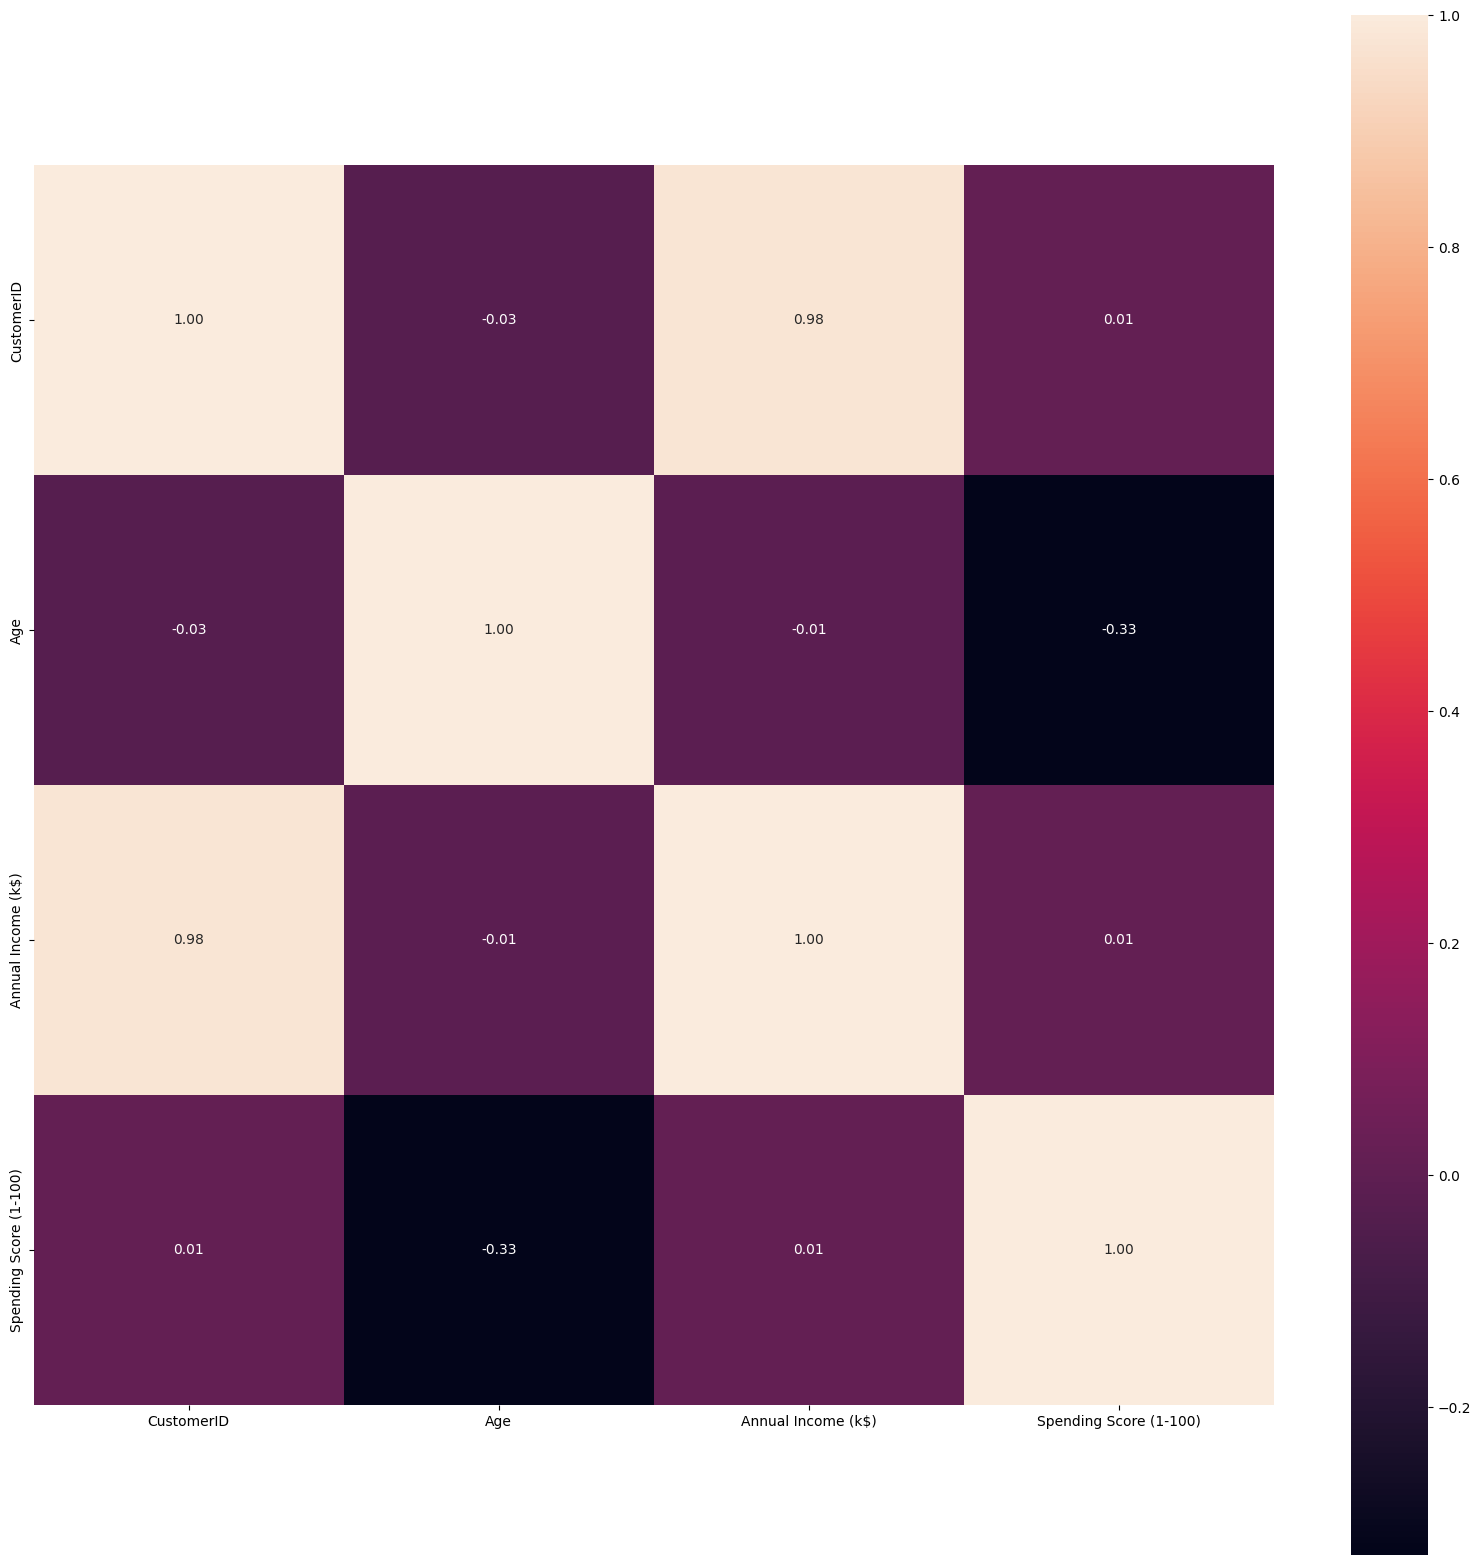

In [ ]:
#Corellation
df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size':10})

PREPROCESSING

In [ ]:
#Data Cleaning

In [ ]:
#Drop CustomerID column
df = df.drop(['CustomerID'], axis=1)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
#missing value
df.isna().sum()[df.isna().sum()!=0]

Series([], dtype: int64)

In [ ]:
#outliers

In [ ]:
#Data Construction

In [ ]:
#Label Encoding
#Di kolom Gender, type datanya object
print(df['Gender'].dtype)

from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
encoder = LabelEncoder()
categorical_data = ['Gender']
for column in categorical_data:
  df2[column] = encoder.fit_transform(df[column])
df2.head()

object


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Modelling

In [ ]:
X = df2
X = X.values

In [ ]:
#K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

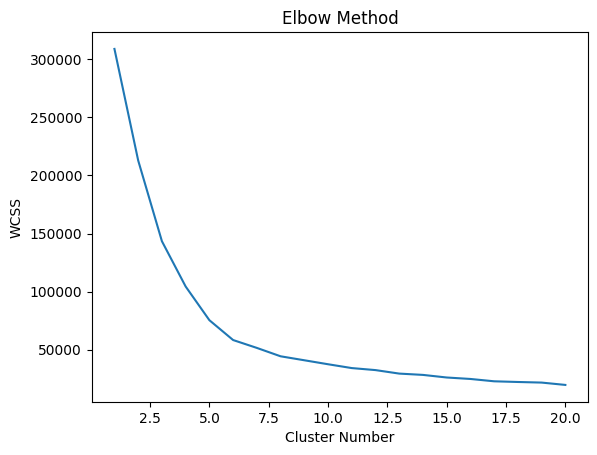

In [ ]:
# metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


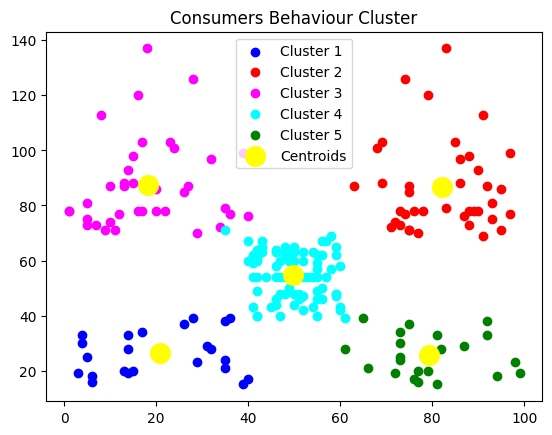

In [ ]:
# Visualisasi
plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0, 2], c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1, 2], c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2, 2], c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 3], X[y_kmeans == 3, 2], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 3], X[y_kmeans == 4, 2], c = 'green', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 3], X[y_kmeans == 5, 2], c = 'orange', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 2], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Consumers Behaviour Cluster')
plt.legend()
plt.show()

In [ ]:
#Hierarcical Clustering

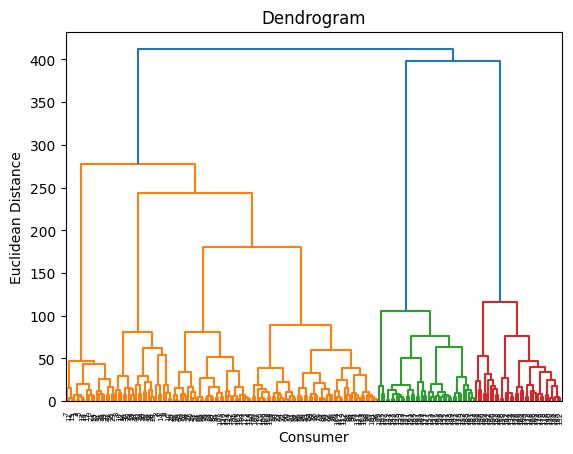

In [ ]:
# dendrogram untuk menentukan jumlah cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


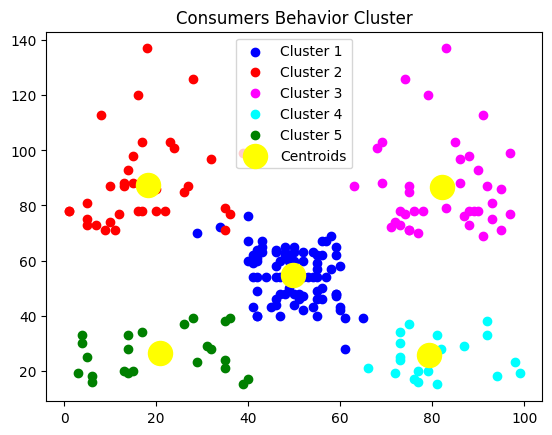

In [ ]:
# Visualisasi
plt.scatter(X[y_hc == 0, 3], X[y_hc == 0, 2], c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 3], X[y_hc == 1, 2], c = 'red', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 3], X[y_hc == 2, 2], c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 3], X[y_hc == 3, 2], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 3], X[y_hc == 4, 2], c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Behavior Cluster')
plt.legend()
plt.show()

In [ ]:
#DBSCAN